<a href="https://colab.research.google.com/github/mohammedmoin44/Tele-comm-churn_Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing  libraries


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the csv file using pandas library

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Getting information regarding data type

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

|Name|Description          |Value Type          |Statistical Type         |
|------------|:----------|:--------|:--------|
|state|State abbreviation (like KS = Kansas)|String|Categorical|
|Account length|How long the client has been with the company|Numerical|Quantitative|
|Area code|Phone number prefix|Numerical|Categorical|
|International plan|	International plan (on/off)	|String, "Yes"/"No"|	Categorical/Binary|
|Voice mail plan|	Voicemail (on/off)|	String, "Yes"/"No"	|Categorical/Binary
|Number vmail messages|	Number of voicemail messages|	Numerical	|Quantitative
|Total day minutes|	Total duration of daytime calls	|Numerical|	Quantitative
|Total day calls|	Total number of daytime calls|	Numerical	|Quantitative
|Total day charge|	Total charge for daytime services|	Numerical|	Quantitative
|Total eve minutes|	Total duration of evening calls	|Numerical|	Quantitative
|Total eve calls|	Total number of evening calls	|Numerical|	Quantitative
|Total eve charge	|Total charge for evening services|	Numerical|	Quantitative
|Total night minutes|	Total duration of nighttime calls|	Numerical|	Quantitative
|Total night calls|	Total number of nighttime calls|	Numerical|	Quantitative
|Total night charge|	Total charge for nighttime services|	Numerical	|Quantitative
|Total intl minutes|	Total duration of international calls	|Numerical|	Quantitative
|Total intl calls	|Total number of international calls|	Numerical|	Quantitative
|Total intl charge|	Total charge for international calls|	Numerical	|Quantitative
|Customer service calls|	Number of calls to customer service	|Numerical|	Categorical/Ordin
|Churn|customers who left the company|String,"Yes"/"No"|Categorical/Binary


Checking the null values in the data

In [44]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [42]:
df[['Churn']].value_counts()

Churn
False    2850
True      483
dtype: int64

From below observation we can say that data is unequally distributed

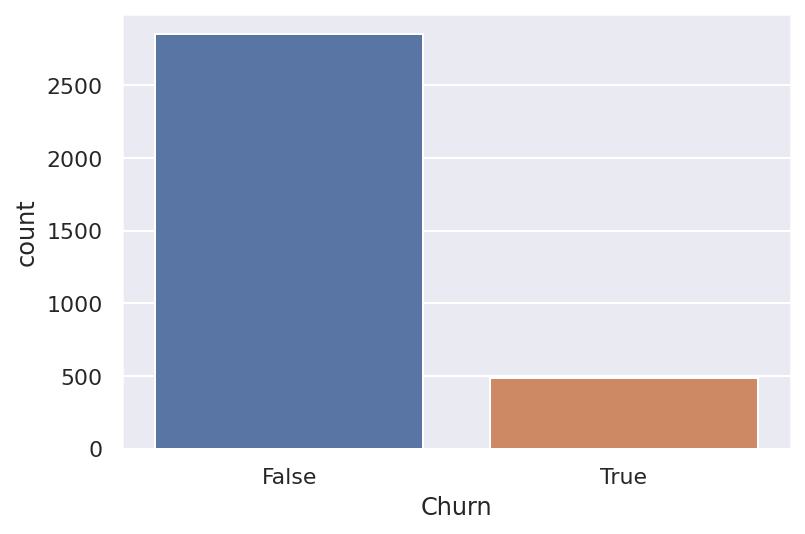

In [50]:
churn_plot = sns.countplot(data=df,x='Churn')
churn_plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


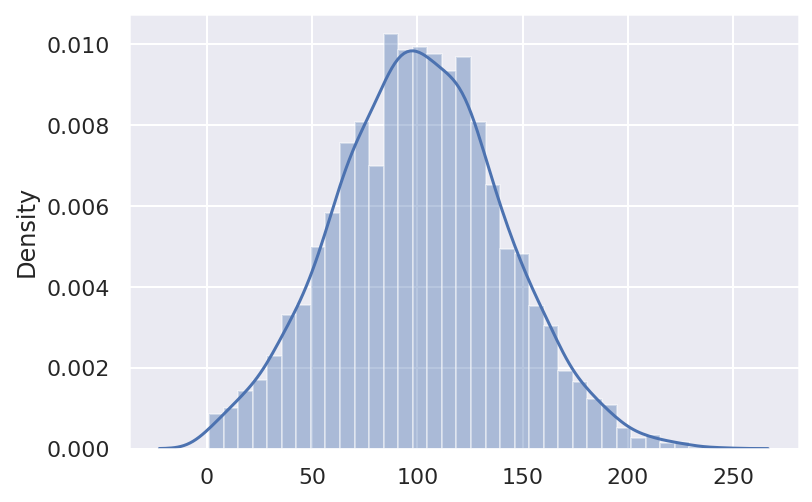

In [60]:
sns.distplot(x=df['Account length'])

most number of customers have duration from 50 to 150 and the data is normally distributed

Text(0.5, 1.0, 'Telecom Customer churn prediction')

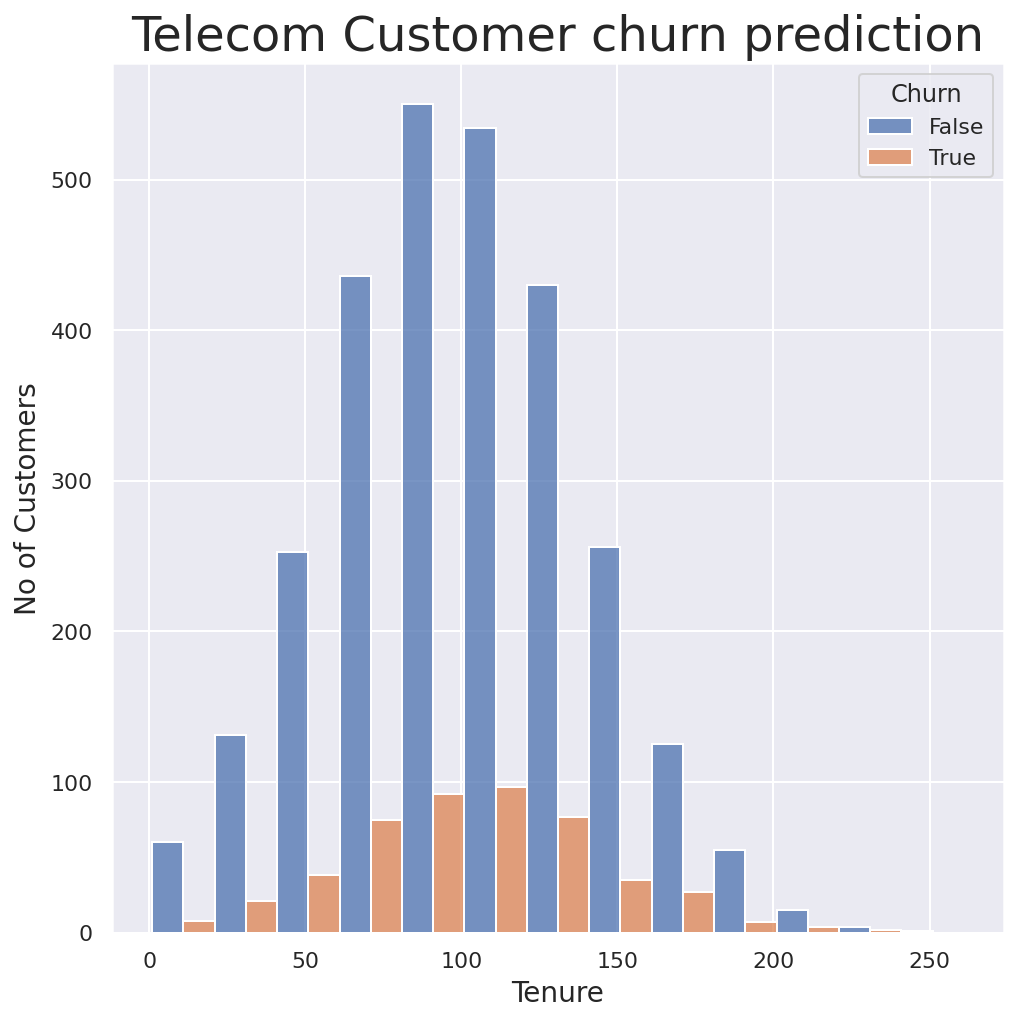

In [75]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Account length',hue='Churn',multiple="dodge",binwidth = 20)
gr.set_xlabel("Tenure",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Telecom Customer churn prediction',fontsize=24)

The above figure does not provide any significant insight as we can see the customers account length have no impact on leaving the company

In [82]:
df['Area code'].unique()

array([415, 408, 510])

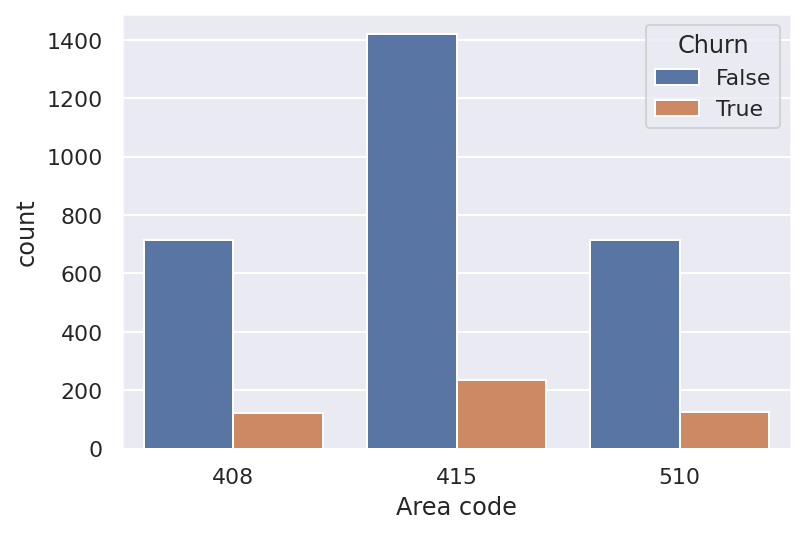

In [83]:
churn_plot_Ar_co = sns.countplot(data=df,x='Area code' ,hue='Churn')
churn_plot_Ar_co

The most number of user's are from Area code 415 in this data